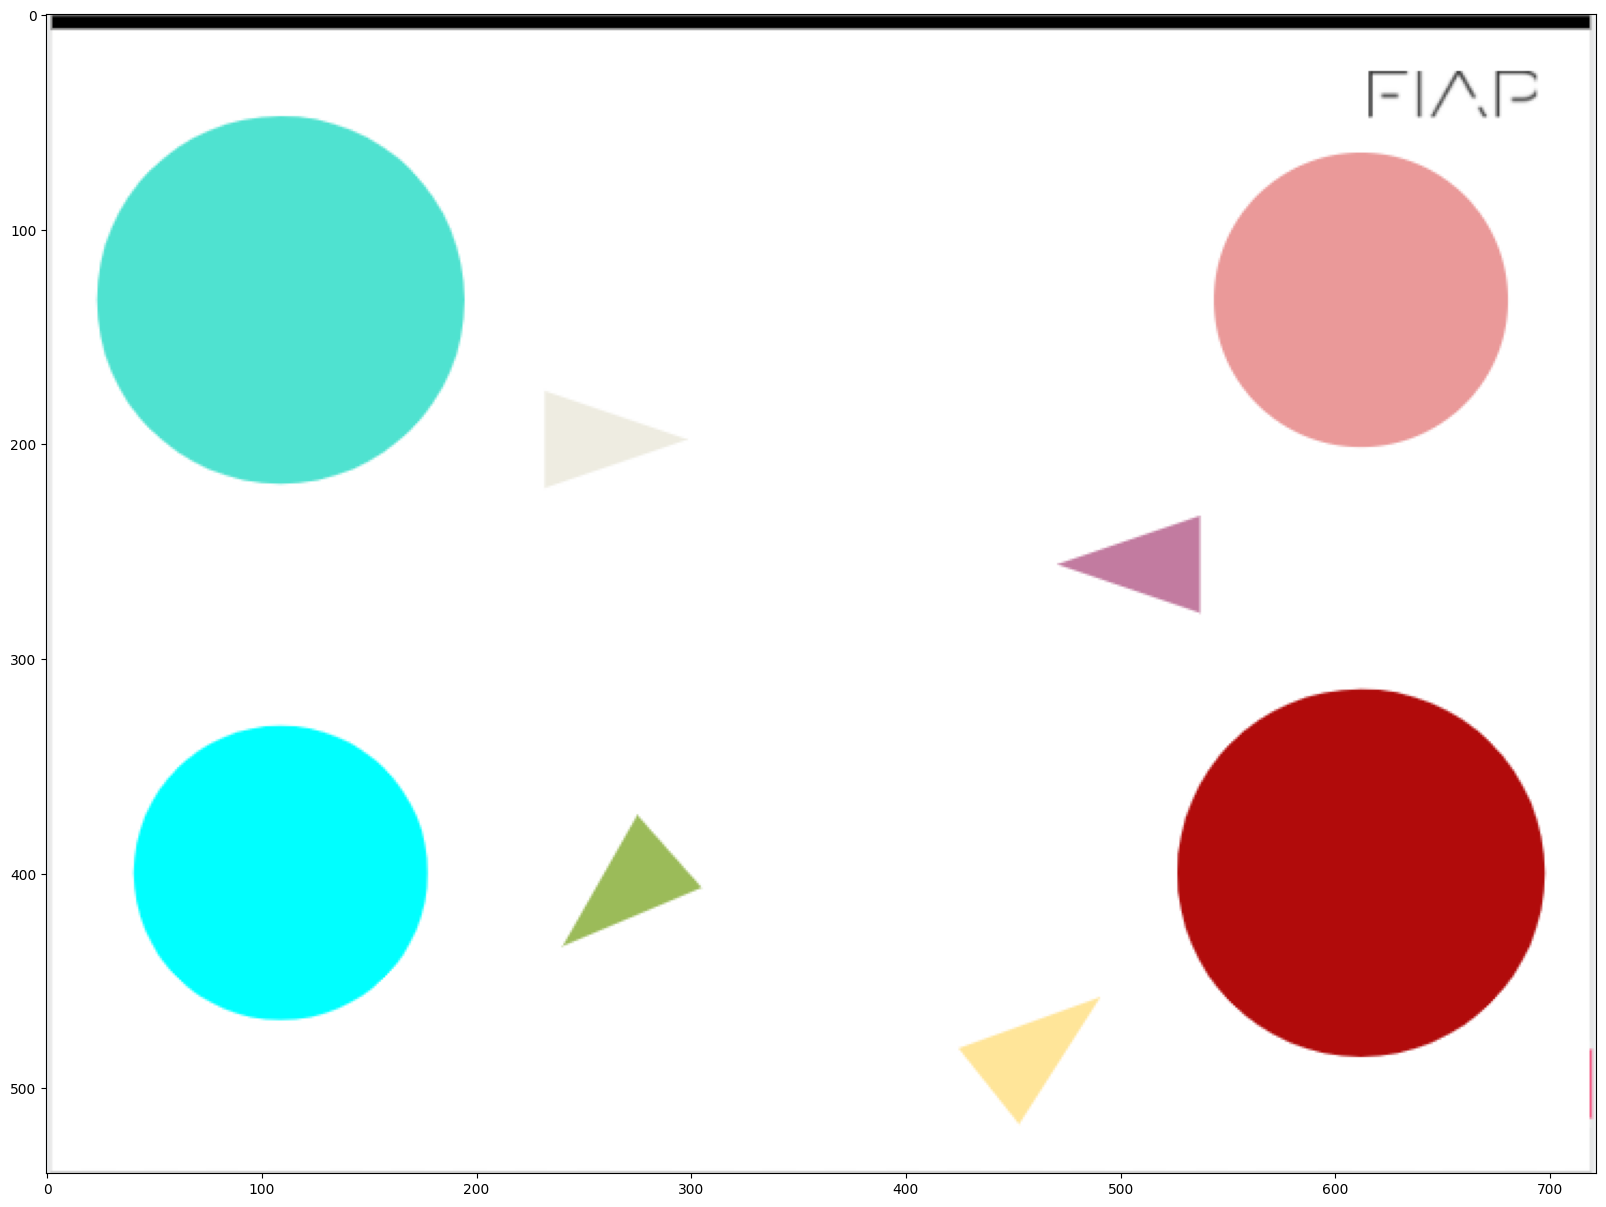

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20,20))
plt.imshow(img); plt.show()

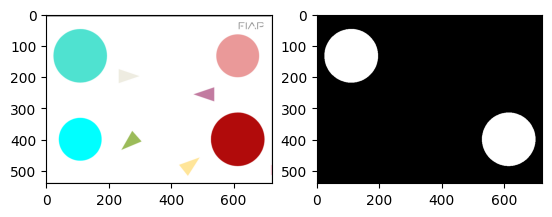

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([0, 150, 0])  
image_upper_hsv = np.array([30, 255, 255])

image_lower_hsv2 = np.array([45, 70, 150])  
image_upper_hsv2 = np.array([87, 180, 255])




mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

mask_soma= cv2.bitwise_or (mask_hsv, mask_hsv2)


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_soma, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


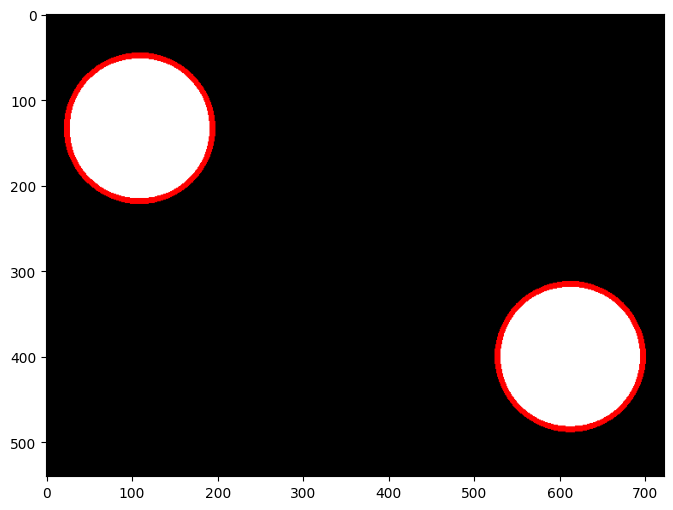

In [4]:
contornos, _ = cv2.findContours(mask_soma, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

bolas = cv2.cvtColor(mask_soma, cv2.COLOR_GRAY2RGB) 
contornos_img = bolas.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);


In [5]:



cnt = contornos[0]

M = cv2.moments(cnt)
print( M )


cnt2 = contornos[1]

M2 = cv2.moments(cnt2)
print( M2 )

{'m00': 22646.0, 'm10': 13860052.0, 'm01': 9054223.833333332, 'm20': 8523601170.333333, 'm11': 5541455499.916666, 'm02': 3660822301.833333, 'm30': 5266674915395.0, 'm21': 3407856843473.95, 'm12': 2240528726495.0835, 'm03': 1496281082010.85, 'mu20': 40820924.69595909, 'mu11': -9356.995781898499, 'mu02': 40802465.03648901, 'mu30': 194648.3349609375, 'mu21': -327124.1125526428, 'mu12': -198061.18494415283, 'mu03': 333196.8518066406, 'nu20': 0.07959757418600627, 'nu11': -1.8245401628090546e-05, 'nu02': 0.07956157931021494, 'nu30': 2.5221559456885505e-06, 'nu21': -4.238710932812825e-06, 'nu12': -2.5663779518959862e-06, 'nu03': 4.317398456233771e-06}
{'m00': 22793.0, 'm10': 2481522.5, 'm01': 3032237.0, 'm20': 311516763.6666666, 'm11': 330126348.5833333, 'm02': 444727993.5, 'm30': 42919572461.25, 'm21': 41442484834.75, 'm12': 48417774130.583336, 'm03': 70162377007.5, 'mu20': 41348118.994782686, 'mu11': 242.28611481189728, 'mu02': 41338302.62258142, 'mu30': 762589.6895599365, 'mu21': 206091.83

In [6]:

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na posição: ",cx, cy)


cx2 = int(M2['m10']/M['m00'])
cy2 = int(M2['m01']/M['m00'])

print("centro de massa na posição: ",cx2, cy2)

centro de massa na posição:  612 399
centro de massa na posição:  109 133


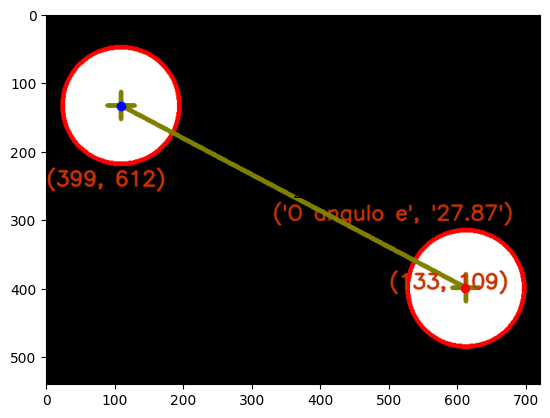

In [8]:
size = 20
color = (128,128,0)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)


cv2.line(contornos_img,(612,399),(109,133),color,5)


 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
text2 = cy2 , cx2
origem = (0,250)
origem2= (500,400)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img);

dx = cx - cx2
dy = cy - cy2

angle = math.atan2(dy,dx)

angle_degrees = math.degrees(angle)
angle_degrees_str = f"{angle_degrees:.2f}"

plt.plot(cx, cy, 'ro')
plt.plot(cx2, cy2, 'bo')

angle_length = 2
x_vals = [cx, cx + angle_length * math.cos(angle)]
y_vals = [cy, cy + angle_length * math.sin(angle)]
plt.plot(x_vals, y_vals, 'r')


mid_x = (cx + cx2) / 2
mid_y = (cy + cy2) / 2
plt.text(mid_x, mid_y, f"{angle_degrees:.2f} degrees", fontsize=12)


font = cv2.FONT_HERSHEY_SIMPLEX
textoAngulo = "O angulo e", angle_degrees_str
origemAngle = (330,300)
angulo1 = (cx-300,cy+100)

cv2.putText(contornos_img, str(textoAngulo), origemAngle, font,1,(200,50,0),2,cv2.LINE_AA)


plt.show()


